Gunshot Example vs Non Gunshot Example
gunshot example link: https://www.youtube.com/watch?v=-gPM1IQBHkc
non gunshot example link: https://www.youtube.com/watch?v=HMp3VHakVKw

In [1]:
cd ../dataprocessing

In [22]:
# import statements
import audio_processing as ap

import functools
import os
import sys
from absl import logging

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import librosa

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.utils import np_utils
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
# set logging to print logging.INFO logs
logging.set_verbosity(logging.INFO)

In [4]:
# arguments for audio_processing
src_dir = 'example_src_dir'
dest_dir = 'example_dest_dir'
filename = 'visualize_features'
labels = ['Gunshot, gunfire']
features_to_extract = ['chroma_stft',
                       'chroma_cqt',
                       'chroma_cens',
                       'melspectrogram',
                       'mfcc',
                       'rms',
                       'spectral_centroid',
                       'spectral_bandwidth',
                       'spectral_contrast',
                       'spectral_flatness',
                       'spectral_rolloff',
                       'poly_features',
                       'tonnetz',
                       'zero_crossing_rate'
]

In [5]:
# Import the dataset
df = ap.output_df(src_dir, dest_dir, filename, labels, features_to_extract, False, redo=True)

INFO:absl:The set has 2 examples


downloading video
[youtube] -gPM1IQBHkc: Downloading webpage
[download] Destination: example_dest_dir/tmp/-gPM1IQBHkc.m4a
[download] 100% of 922.89KiB in 00:0019MiB/s ETA 00:001
[ffmpeg] Correcting container in "example_dest_dir/tmp/-gPM1IQBHkc.m4a"
[ffmpeg] Post-process file example_dest_dir/tmp/-gPM1IQBHkc.m4a exists, skipping


INFO:absl:Download Complete
INFO:absl:chopped_audio


downloading video
[youtube] HMp3VHakVKw: Downloading webpage
[download] Destination: example_dest_dir/tmp/HMp3VHakVKw.webm
[download] 100% of 2.29MiB in 00:0027MiB/s ETA 00:0002
[ffmpeg] Destination: example_dest_dir/tmp/HMp3VHakVKw.opus
Deleting original file example_dest_dir/tmp/HMp3VHakVKw.webm (pass -k to keep)


INFO:absl:Download Complete
INFO:absl:chopped_audio
INFO:absl:2 examples successfully downloaded
INFO:absl:Time to download: 4.436887
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:(0, 12.692205)
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:extracted features
INFO:absl:(1, 20.559427)
INFO

In [16]:
df.head()

,label,chroma_stft,chroma_cqt,chroma_cens,melspectrogram,mfcc,rms,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_flatness,spectral_rolloff,poly_features,tonnetz,zero_crossing_rate
0,1,"[[0.0, 0.0, 0.0, 0.0, 0.7836249, 0.54285324, 0...","[[0.09258408397838813, 0.29281937134384245, 0....","[[0.22369786432146194, 0.22729126207787814, 0....","[[0.0, 0.0, 0.0, 0.0, 0.0016109014, 0.25045666...","[[-657.38403, -657.38403, -657.38403, -657.384...","[[0.0, 0.0, 0.0, 0.0, 0.0046520517, 0.03861855...","[[0.0, 0.0, 0.0, 0.0, 2015.3045826157543, 2313...","[[0.0, 0.0, 0.0, 0.0, 2615.098141918859, 2695....","[[10.014450030697795, 10.014450030697795, 10.0...","[[1.0000007, 1.0000007, 1.0000007, 1.0000007, ...","[[0.0, 0.0, 0.0, 0.0, 5081.8359375, 5663.23242...","[[0.0, 0.0, 0.0, 0.0, -1.6424078469954708e-06,...","[[-0.28102570774648, -0.13740358999520996, -0....","[[0.0582312925170068, 0.060045351473922905, 0...."
1,0,"[[0.23179506, 0.24008964, 0.19523025, 0.307452...","[[0.4335042444372439, 0.5997672061197934, 0.36...","[[0.2991746992028136, 0.303567161079119, 0.307...","[[0.019795934, 0.01764908, 0.014517155, 0.0464...","[[-393.32425, -358.65057, -305.81363, -292.944...","[[0.024666155, 0.03652693, 0.04397792, 0.05069...","[[632.6626973078273, 697.5850027667651, 708.91...","[[1206.4440610764414, 1120.9771299846254, 1004...","[[13.59012782288142, 18.6156827850104, 17.3921...","[[0.00010328917, 0.00030978382, 0.00022840177,...","[[764.4287109375, 861.328125, 968.994140625, 9...","[[-8.54170786207522e-05, -8.969041815871419e-0...","[[-0.04785370478493173, 0.016290546483931523, ...","[[0.020045351473922904, 0.02145124716553288, 0..."


In [40]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [41]:
def view_spectral_centroid(feature):
    frames = range(len(feature))
    t = librosa.frames_to_time(frames)
    normalized_feature = normalize(feature)
    plt.plot(t, feature, color='r')

In [ ]:
def view_chroma_stft(feature):
    frames = range(len(feature))
    t = librosa.frames_to_time(frames)
    normalized_feature = normalize(feature)
    plt.plot(t, feature, color='r')

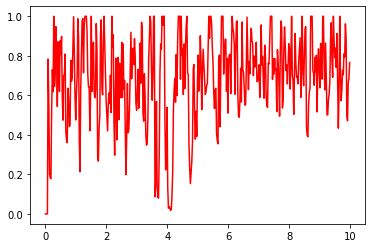

In [129]:
# gunshot chroma_sfft
view_spectral_centroid(df['chroma_stft'][0][0])

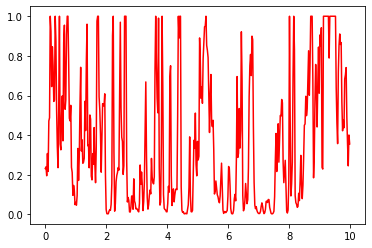

In [50]:
# non gunshot chroma_sfft
view_spectral_centroid(df['chroma_stft'][1][0])

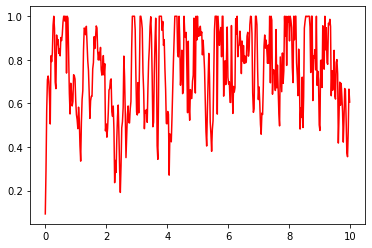

In [53]:
# gunshot chroma_cqt
view_spectral_centroid(df['chroma_cqt'][0][0])

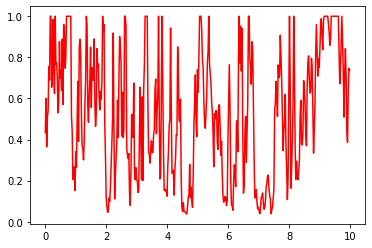

In [54]:
# non gunshot chroma_cqt
view_spectral_centroid(df['chroma_cqt'][1][0])

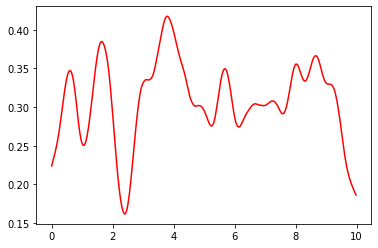

In [63]:
# gunshot chroma_cens
view_spectral_centroid(df['chroma_cens'][0][0])

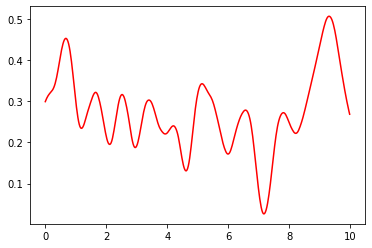

In [64]:
# non gunshot chroma_cens
view_spectral_centroid(df['chroma_cens'][1][0])

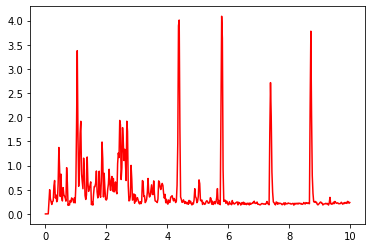

In [62]:
# gunshot melspectrogram
view_spectral_centroid(df['melspectrogram'][0][0])

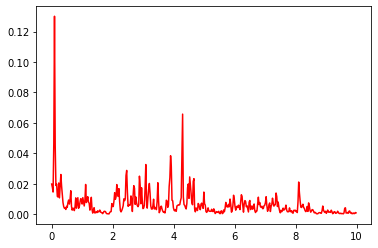

In [61]:
# non gunshot melspectrogram
view_spectral_centroid(df['melspectrogram'][1][0])

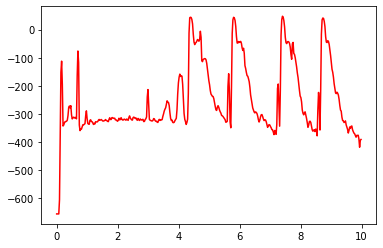

In [150]:
# gunshot mfcc
view_spectral_centroid(df['mfcc'][0][0])

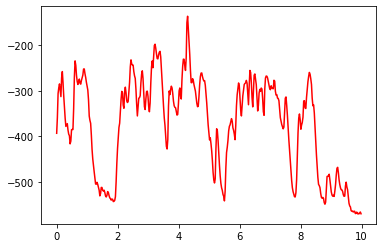

In [67]:
# non gunshot mfcc
view_spectral_centroid(df['mfcc'][1][0])

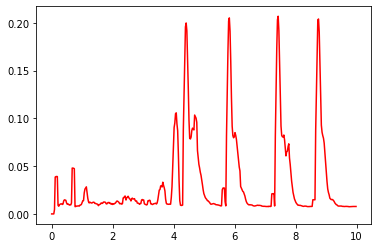

In [68]:
# gunshot rms
view_spectral_centroid(df['rms'][0][0])

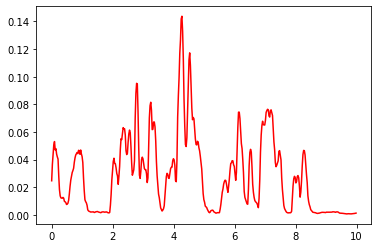

In [69]:
# non gunshot rms
view_spectral_centroid(df['rms'][1][0])

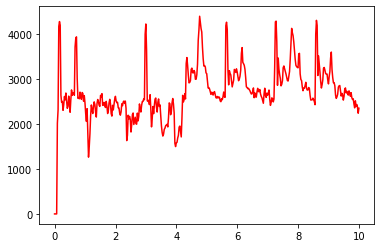

In [70]:
# gunshot spectral_centroid
view_spectral_centroid(df['spectral_centroid'][0][0])

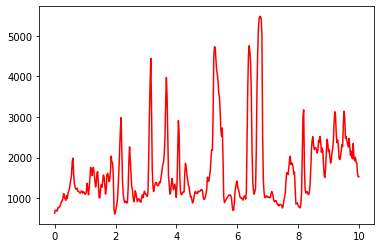

In [71]:
# non gunshot spectral_centroid
view_spectral_centroid(df['spectral_centroid'][1][0])

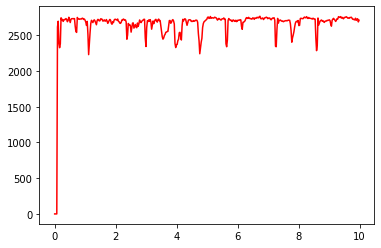

In [72]:
# gunshot spectral_bandwidth
view_spectral_centroid(df['spectral_bandwidth'][0][0])

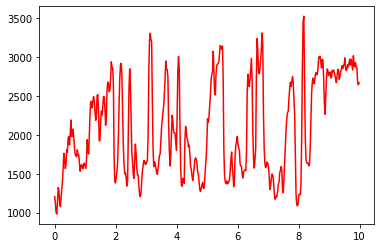

In [73]:
# non gunshot spectral_bandwidth
view_spectral_centroid(df['spectral_bandwidth'][1][0])

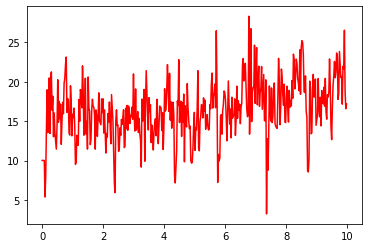

In [74]:
# gunshot spectral_contrast
view_spectral_centroid(df['spectral_contrast'][0][0])

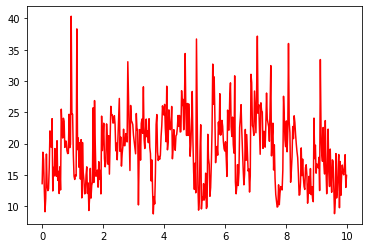

In [75]:
# non gunshot spectral_contrast
view_spectral_centroid(df['spectral_contrast'][1][0])

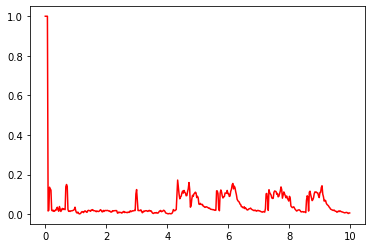

In [76]:
# gunshot spectral_flatness
view_spectral_centroid(df['spectral_flatness'][0][0])

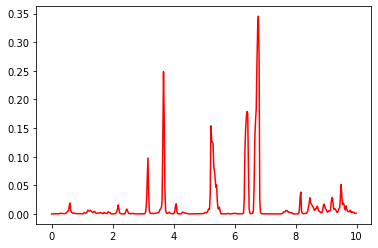

In [77]:
# non gunshot spectral_flatness
view_spectral_centroid(df['spectral_flatness'][1][0])

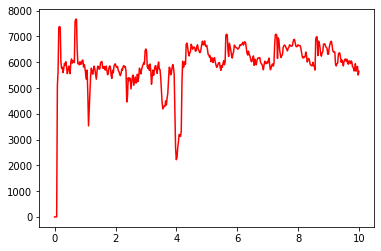

In [78]:
# gunshot spectral_rolloff
view_spectral_centroid(df['spectral_rolloff'][0][0])

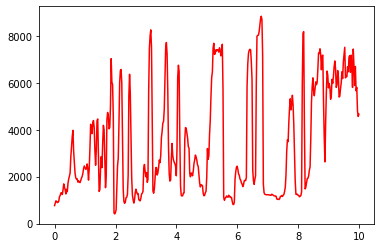

In [79]:
# non gunshot spectral_rolloff
view_spectral_centroid(df['spectral_rolloff'][1][0])

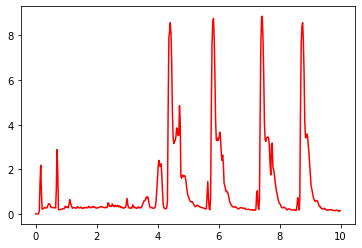

In [160]:
# gunshot poly_features
view_spectral_centroid(df['poly_features'][0][1])

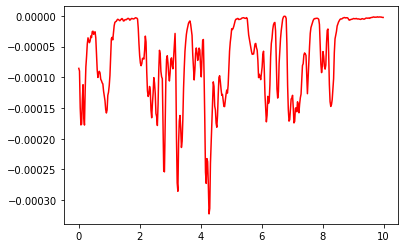

In [81]:
# non gunshot poly_features
view_spectral_centroid(df['poly_features'][1][0])

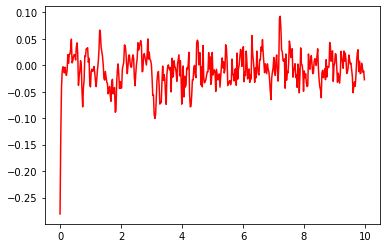

In [82]:
# gunshot tonnetz
view_spectral_centroid(df['tonnetz'][0][0])

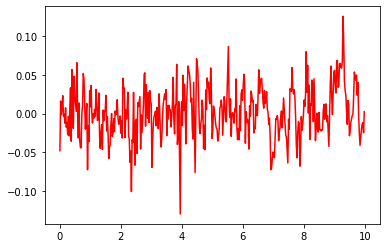

In [125]:
# non gunshot tonnetz
view_spectral_centroid(df['tonnetz'][1][0])

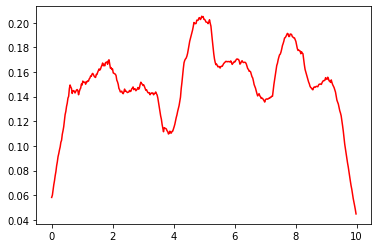

In [85]:
# gunshot zero_crossing_rate
view_spectral_centroid(df['zero_crossing_rate'][0][0])

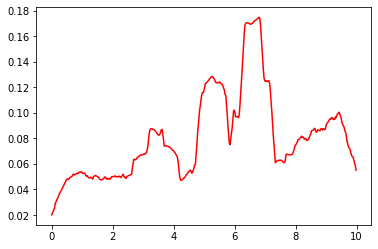

In [121]:
# non gunshot zero_crossing_rate
view_spectral_centroid(df['zero_crossing_rate'][1][0])

In [162]:
print('chroma_stft')
print('number of elements per subarray', df['chroma_stft'][0][0].size)
print('total number of elements', df['chroma_stft'][0].size)
print("number of subarrays", len(df['chroma_stft'][0]), '\n')

print('chroma_cqt')
print('number of elements per subarray', df['chroma_cqt'][0][0].size)
print('total number of elements', df['chroma_cqt'][0].size)
print("number of subarrays", len(df['chroma_cqt'][0]), '\n')

print('chroma_cens')
print('number of elements per subarray', df['chroma_cens'][0][0].size)
print('total number of elements', df['chroma_cens'][0].size)
print("number of subarrays", len(df['chroma_cens'][0]), '\n')

print('melspectrogram')
print('number of elements per subarray', df['melspectrogram'][0][0].size)
print('total number of elements', df['melspectrogram'][0].size)
print("number of subarrays", len(df['melspectrogram'][0]), '\n')

print('mfcc')
print('number of elements per subarray', df['mfcc'][0][0].size)
print('total number of elements', df['mfcc'][0].size)
print("number of subarrays", len(df['mfcc'][0]), '\n')

print('rms')
print('number of elements per subarray', df['rms'][0][0].size)
print('total number of elements', df['rms'][0].size)
print("number of subarrays", len(df['rms'][0]), '\n')

print('spectral_centroid')
print('number of elements per subarray', df['spectral_centroid'][0][0].size)
print('total number of elements', df['spectral_centroid'][0].size)
print("number of subarrays", len(df['spectral_centroid'][0]), '\n')

print('spectral_bandwidth')
print('number of elements per subarray', df['spectral_bandwidth'][0][0].size)
print('total number of elements', df['spectral_bandwidth'][0].size)
print("number of subarrays", len(df['spectral_bandwidth'][0]), '\n')

print('spectral_contrast')
print('number of elements per subarray', df['spectral_contrast'][0][0].size)
print('total number of elements', df['spectral_contrast'][0].size)
print("number of subarrays", len(df['spectral_contrast'][0]), '\n')

print('spectral_flatness')
print('number of elements per subarray', df['spectral_flatness'][0][0].size)
print('total number of elements', df['spectral_flatness'][0].size)
print("number of subarrays", len(df['spectral_flatness'][0]), '\n')

print('spectral_rolloff')
print('number of elements per subarray', df['spectral_rolloff'][0][0].size)
print('total number of elements', df['spectral_rolloff'][0].size)
print("number of subarrays", len(df['spectral_rolloff'][0]), '\n')

print('poly_features')
print('number of elements per subarray', df['poly_features'][0][0].size)
print('total number of elements', df['poly_features'][0].size)
print("number of subarrays", len(df['poly_features'][0]), '\n')

print('tonnetz')
print('number of elements per subarray', df['tonnetz'][0][0].size)
print('total number of elements', df['tonnetz'][0].size)
print("number of subarrays", len(df['tonnetz'][0]), '\n')

print('zero_crossing_rate')
print('number of elements per subarray', df['zero_crossing_rate'][0][0].size)
print('total number of elements', df['zero_crossing_rate'][0].size)
print("number of subarrays", len(df['zero_crossing_rate']), '\n')

chroma_stft
number of elements per subarray 431
total number of elements 5172
number of subarrays 12 

chroma_cqt
number of elements per subarray 431
total number of elements 5172
number of subarrays 12 

chroma_cens
number of elements per subarray 431
total number of elements 5172
number of subarrays 12 

melspectrogram
number of elements per subarray 431
total number of elements 55168
number of subarrays 128 

mfcc
number of elements per subarray 431
total number of elements 8620
number of subarrays 20 

rms
number of elements per subarray 431
total number of elements 431
number of subarrays 1 

spectral_centroid
number of elements per subarray 431
total number of elements 431
number of subarrays 1 

spectral_bandwidth
number of elements per subarray 431
total number of elements 431
number of subarrays 1 

spectral_contrast
number of elements per subarray 431
total number of elements 3017
number of subarrays 7 

spectral_flatness
number of elements per subarray 431
total number of el